In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import cityblock
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')

In [2]:
NO2=pd.read_csv("NO2_E43.csv")
NO2.rename(columns = {'mg/m^3_43':'mg/m^3'}, inplace = True)
NO2

,DATETIME,mg/m^3
0,2019-04-02 01:00:00,27.0
1,2019-04-02 02:00:00,28.0
2,2019-04-02 03:00:00,32.0
3,2019-04-02 04:00:00,41.0
4,2019-04-02 05:00:00,56.0
...,...,...
25795,2022-03-31 20:00:00,59.0
25796,2022-03-31 21:00:00,55.0
25797,2022-03-31 22:00:00,57.0
25798,2022-03-31 23:00:00,46.0


In [3]:
NO2.describe()

,mg/m^3
count,24772.000000
mean,39.937954
std,21.892972
min,1.000000
25%,23.000000
50%,36.000000
75%,53.000000
max,207.000000


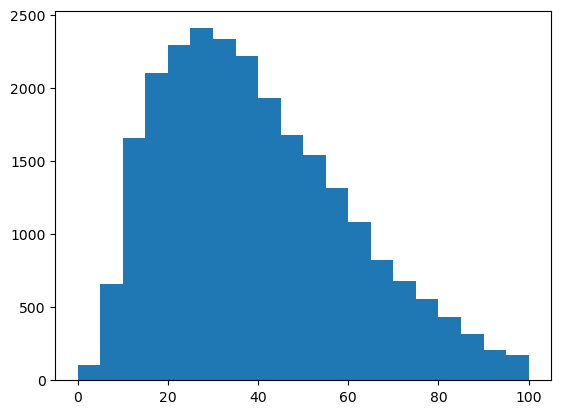

In [4]:
plt.hist(NO2["mg/m^3"],bins=20, range=(0,100))
plt.show()

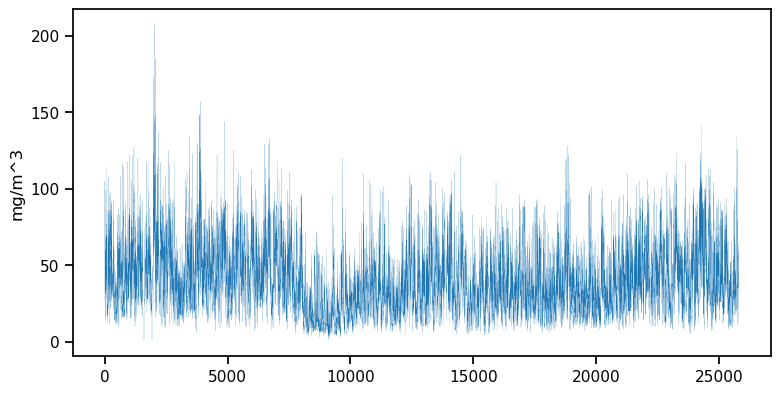

In [5]:
plt.figure(figsize=(9,4.5))
sns.set_context("notebook")
sns.axes_style("whitegrid")
sns.lineplot(data=NO2["mg/m^3"],linewidth=.1)
plt.show()

In [6]:
# % of missing values
NO2.count()/len(NO2)

DATETIME    1.000000
mg/m^3      0.960155
dtype: float64

In [7]:
NO2[ "mg/m^3_acum_NAN"]= 0

for j in range(1,len(NO2)):

    if NO2["mg/m^3"].isna()[j] == True :
        NO2[ "mg/m^3_acum_NAN"][j] =   NO2[ "mg/m^3_acum_NAN"][j-1]+1   
        
        
    else:
        NO2[ "mg/m^3_acum_NAN"][j] = 0

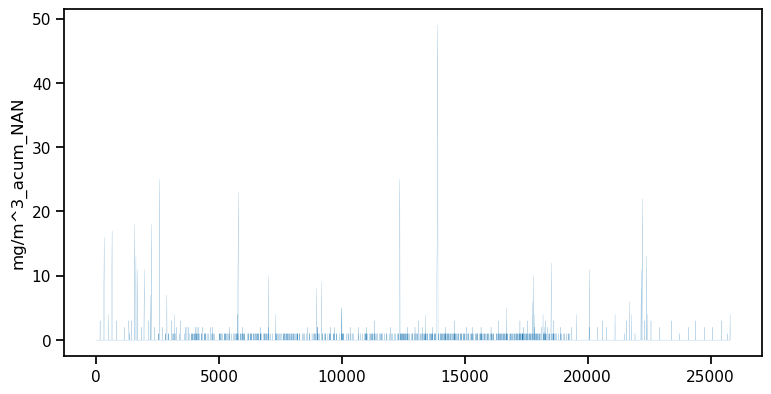

In [8]:
plt.figure(figsize=(9,4.5))
sns.set_context("notebook")
sns.axes_style("whitegrid")
sns.lineplot(data=NO2["mg/m^3_acum_NAN"],linewidth=.1)
plt.show()

In [9]:
NO2[ "mg/m^3_peaks_acum_NAN"]= NO2[ "mg/m^3_acum_NAN"]


for j in range(1,len(NO2)):

    if (NO2["mg/m^3_acum_NAN"][j] == 0) or (NO2["mg/m^3_acum_NAN"][j+1] > 0) :
          
        NO2[ "mg/m^3_peaks_acum_NAN"][j] = 0

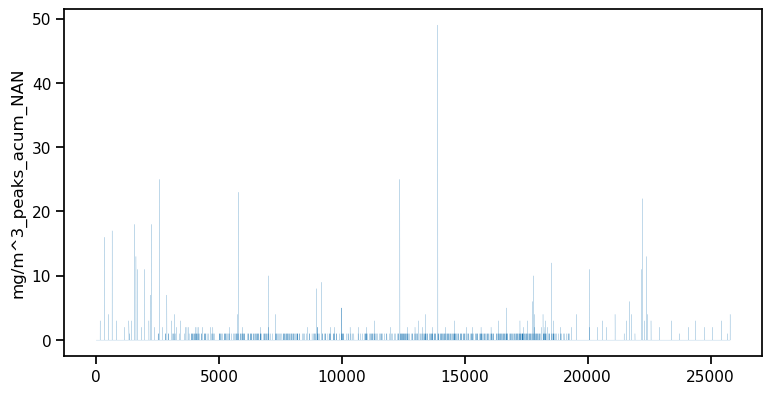

In [10]:
plt.figure(figsize=(9,4.5))
sns.set_context("notebook")
sns.axes_style("whitegrid")
sns.lineplot(data=NO2["mg/m^3_peaks_acum_NAN"],linewidth=.1)
plt.show()

In [11]:
NO2["mg/m^3_peaks_acum_NAN"].value_counts().sort_index()

0     25250
1       437
2        52
3        22
4        12
5         3
6         2
7         2
8         1
9         1
10        2
11        4
12        1
13        2
16        1
17        1
18        2
22        1
23        1
25        2
49        1
Name: mg/m^3_peaks_acum_NAN, dtype: int64

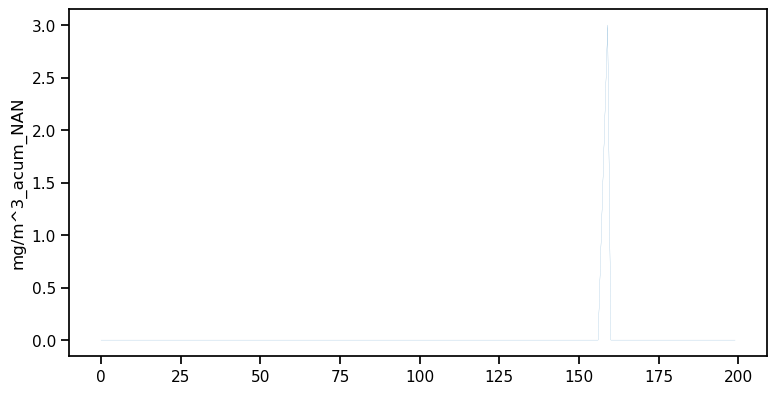

In [12]:
plt.figure(figsize=(9,4.5))
sns.set_context("notebook")
sns.axes_style("whitegrid")
sns.lineplot(data=NO2[:200]["mg/m^3_acum_NAN"],linewidth=.1)
plt.show()

In [13]:
NO2["mg/m^3_im"] = NO2["mg/m^3"].fillna(NO2["mg/m^3"].mean())
NO2

,DATETIME,mg/m^3,mg/m^3_acum_NAN,mg/m^3_peaks_acum_NAN,mg/m^3_im
0,2019-04-02 01:00:00,27.0,0,0,27.0
1,2019-04-02 02:00:00,28.0,0,0,28.0
2,2019-04-02 03:00:00,32.0,0,0,32.0
3,2019-04-02 04:00:00,41.0,0,0,41.0
4,2019-04-02 05:00:00,56.0,0,0,56.0
...,...,...,...,...,...
25795,2022-03-31 20:00:00,59.0,0,0,59.0
25796,2022-03-31 21:00:00,55.0,0,0,55.0
25797,2022-03-31 22:00:00,57.0,0,0,57.0
25798,2022-03-31 23:00:00,46.0,0,0,46.0


In [14]:
NO2["mg/m^3_im_24h"] = np.nan

for j in range(23, len(NO2)):

    NO2[ "mg/m^3_im_24h"][j] = NO2["mg/m^3_im"][j-23:j+1].mean()
    
NO2

,DATETIME,mg/m^3,mg/m^3_acum_NAN,mg/m^3_peaks_acum_NAN,mg/m^3_im,mg/m^3_im_24h
0,2019-04-02 01:00:00,27.0,0,0,27.0,NaN
1,2019-04-02 02:00:00,28.0,0,0,28.0,NaN
2,2019-04-02 03:00:00,32.0,0,0,32.0,NaN
3,2019-04-02 04:00:00,41.0,0,0,41.0,NaN
4,2019-04-02 05:00:00,56.0,0,0,56.0,NaN
...,...,...,...,...,...,...
25795,2022-03-31 20:00:00,59.0,0,0,59.0,36.822992
25796,2022-03-31 21:00:00,55.0,0,0,55.0,37.197992
25797,2022-03-31 22:00:00,57.0,0,0,57.0,37.364659
25798,2022-03-31 23:00:00,46.0,0,0,46.0,37.031326


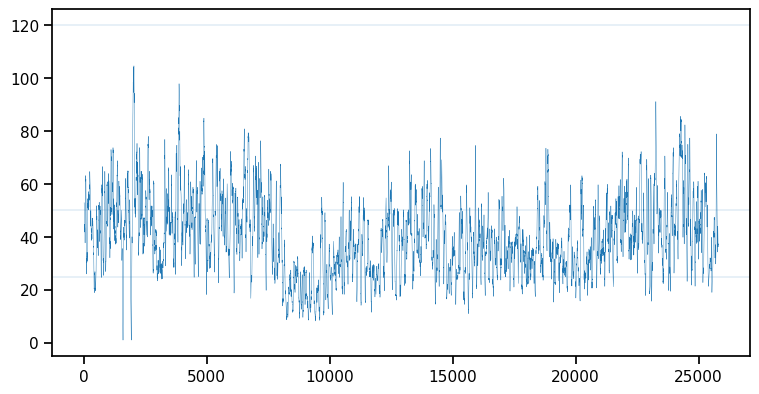

In [15]:
plt.figure(figsize=(9,4.5))
#sns.set_context("notebook")
#sns.axes_style("whitegrid")
#graph = sns.lineplot(data=NO2["mg/m^3_43_24h"],linewidth=.1)

graph = plt.plot(NO2["mg/m^3_im_24h"],linewidth=.3)

plt.axhline(y=120,linewidth=.15)
plt.axhline(y=50,linewidth=.15)
plt.axhline(y=25,linewidth=.15)


plt.show()

In [16]:
NO2["mg/m^3_im_1y"] = np.nan

for j in range(8759, len(NO2)):

    NO2[ "mg/m^3_im_1y"][j] = NO2["mg/m^3_im"][j-8759:j+1].mean()
    
NO2

,DATETIME,mg/m^3,mg/m^3_acum_NAN,mg/m^3_peaks_acum_NAN,mg/m^3_im,mg/m^3_im_24h,mg/m^3_im_1y
0,2019-04-02 01:00:00,27.0,0,0,27.0,NaN,NaN
1,2019-04-02 02:00:00,28.0,0,0,28.0,NaN,NaN
2,2019-04-02 03:00:00,32.0,0,0,32.0,NaN,NaN
3,2019-04-02 04:00:00,41.0,0,0,41.0,NaN,NaN
4,2019-04-02 05:00:00,56.0,0,0,56.0,NaN,NaN
...,...,...,...,...,...,...,...
25795,2022-03-31 20:00:00,59.0,0,0,59.0,36.822992,40.380057
25796,2022-03-31 21:00:00,55.0,0,0,55.0,37.197992,40.382569
25797,2022-03-31 22:00:00,57.0,0,0,57.0,37.364659,40.385423
25798,2022-03-31 23:00:00,46.0,0,0,46.0,37.031326,40.388391


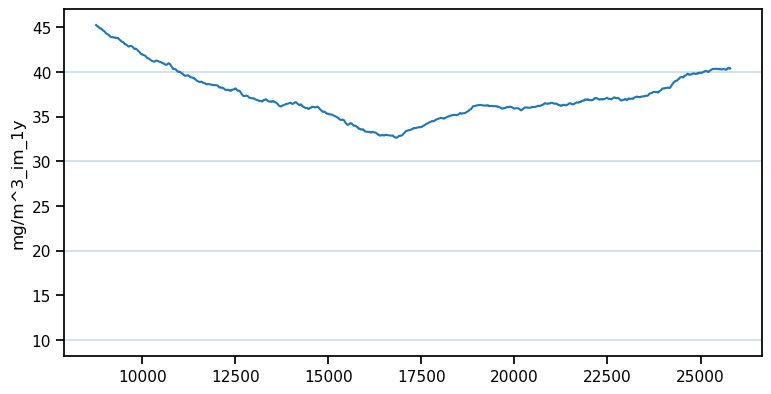

In [17]:
plt.figure(figsize=(9,4.5))
sns.set_context("notebook")
sns.axes_style("whitegrid")
graph = sns.lineplot(data=NO2["mg/m^3_im_1y"])

graph.axhline(10,linewidth=.3)
graph.axhline(20,linewidth=.3)
graph.axhline(30,linewidth=.3)
graph.axhline(40,linewidth=.3)

plt.show()

In [42]:
size = int(len(NO2["mg/m^3_im"])*.8)

train, test = NO2["mg/m^3_im"].iloc[:size], NO2["mg/m^3_im"].iloc[size:]

In [51]:
step_fit = auto_arima(NO2["mg/m^3_im"],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=195879.420, Time=57.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=198655.391, Time=1.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=198618.197, Time=2.71 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=198610.986, Time=4.58 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=198653.391, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=196015.012, Time=25.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=195952.905, Time=26.62 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=195879.895, Time=62.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=195930.440, Time=68.99 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=22.65 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=195940.563, Time=30.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=195904.555, Time=36.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=195881.861, Time=57.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=195877.420, Time=12.32 sec
 A

In [52]:
step_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                25800
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -97933.710
Date:                Fri, 01 Jul 2022   AIC                         195877.420
Time:                        12:11:04   BIC                         195918.211
Sample:                             0   HQIC                        195890.603
                              - 25800                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2924      0.026     50.121      0.000       1.242       1.343
ar.L2         -0.4642      0.021    -22.645      0.000      -0.504      -0.424
ma.L1         -1.3547      0.027    -49.589      0.000      -1.408      -1.301
ma.L2          0.3817      0.027     14.373      0.000       0.330       0.434
sigma2       116.0644      0.673    172.484      0.000     114.746     117.383
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             10608.30
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:


model = ARIMA(NO2["mg/m^3_im"],order=(2,1,2))
model = model.fit(method='mle')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.mg/m^3_im   No. Observations:                25799
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -97933.710
Method:                           mle   S.D. of innovations             10.773
Date:                Fri, 01 Jul 2022   AIC                         195879.420
Time:                        12:12:07   BIC                         195928.368
Sample:                             1   HQIC                        195895.239
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0002      0.011     -0.019      0.985      -0.021       0.021
ar.L1.D.mg/m^3_im     1.2926      0.032     40.285      0.000       1.230       1.355
ar.L2.D.mg/m^3_im    -0.4644      0.026    -17.676      0.000      -0.516      -0.413
ma.L1.D.mg/m^3_im    -1.3549      0.034    -39.815      0.000      -1.422      -1.288
ma.L2.D.mg/m^3_im     0.3819      0.034     11.278      0.000       0.316       0.448
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3917           -0.4653j            1.4675           -0.0513
AR.2            1.3917           +0.4653j            1.4675            0.0513
MA.1            1.0472           +0.0000j            1.0472            0.0000
MA.2            2.5005           +0.0000j            2.5005            0.0000
-----------------------------------------------------------------------------
"""

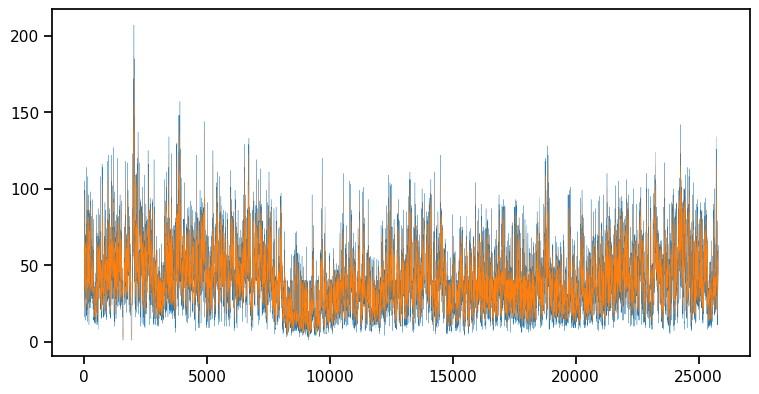

In [61]:
pred=model.predict(typ='levels')
plt.figure(figsize=(9,4.5))


plt.plot(NO2["mg/m^3_im"], linewidth =.2)
plt.plot(pred, linewidth=.1)
plt.show()

In [26]:
step_fit = auto_arima(NO2[8759:]["mg/m^3_im_1y"],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-170976.949, Time=11.97 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-169709.918, Time=1.93 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-169804.025, Time=2.35 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-169830.742, Time=2.87 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-170885.148, Time=3.45 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-170837.681, Time=6.92 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-170901.171, Time=7.83 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-170913.450, Time=5.92 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-156713.514, Time=12.13 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-170840.317, Time=10.69 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-170156.884, Time=6.28 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-170976.690, Time=9.56 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-170981.285, Time=30.74 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-170879.652, T

In [27]:
step_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                17041
Model:               SARIMAX(2, 2, 2)   Log Likelihood               85496.642
Date:                Mon, 04 Jul 2022   AIC                        -170981.285
Time:                        12:08:03   BIC                        -170934.825
Sample:                             0   HQIC                       -170965.966
                              - 17041                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.009e-08   3.27e-07      0.031      0.975    -6.3e-07     6.5e-07
ar.L1          0.1692      0.158      1.070      0.285      -0.141       0.479
ar.L2          0.5847      0.137      4.266      0.000       0.316       0.853
ma.L1         -0.2822      0.156     -1.813      0.070      -0.587       0.023
ma.L2         -0.6922      0.154     -4.503      0.000      -0.994      -0.391
sigma2      2.648e-06   2.23e-08    118.942      0.000     2.6e-06    2.69e-06
===================================================================================
Ljung-Box (L1) (Q):                  21.33   Jarque-Bera (JB):              2449.79
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model = ARIMA(NO2[8759:]["mg/m^3_im"],order=(2,2,2))
model = model.fit(method='mle')
model.summary()

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [ ]:
pred=model.predict(typ='levels')
plt.figure(figsize=(9,4.5))


plt.plot(NO2["mg/m^3_im"], linewidth =.2)
plt.plot(pred, linewidth=.1)
plt.show()